In [11]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload



from utils.save_results import *
from utils.read_results import *
from utils.model_setup import *
from utils.dataset_setup import *
from utils.experiment_setup import *
from utils.metric_setup import *

In [12]:
path_to = "./data/"

In [25]:
"""
Setup Model
"""
model_name, model_code = choose_model()

ATENTION - Choose the model:
1 - gemini-1.5-flash
2 - llama-3.2-90b-text-preview
3 - other


Input the number you would like to execute:  2


Choosen Model: llama-3.2-90b-text-preview


In [5]:
"""
Setup Dataset
"""
dataset_name, dataset_code = setup_dataset()

ATENCAO - Escolha o dataset:
1 - essaysFullGrade
2 - aes_enem_dataset
3 - propor2024
4 - extended2024
5 - extended_complete
6 - Outro


KeyboardInterrupt: Interrupted by user

## Tests

In [ ]:
"""
Setup Metric
"""
metric_name = choose_metric()

ATENCAO - Escolha a metrica:
1 - QWK
2 - RMSE
3 - MAE
4 - R2
6 - other


In [ ]:
results

In [ ]:
all_results

## Implementation

Experimento escolhido: exp1
Folder './data/results/llama-3.2-90b-text-preview' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1/essaysFullGrade' already exists.
CSV with the answer will be saved in: essaysFullGrade-llama-3.2-90b-text-preview-exp1-1
Folder './data/results/llama-3.2-90b-text-preview' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1/aes_enem_dataset' already exists.
CSV with the answer will be saved in: aes_enem_dataset-llama-3.2-90b-text-preview-exp1-1
Folder './data/results/llama-3.2-90b-text-preview' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1/essaysFullGrade' already exists.
CSV with the answer will be saved in: essaysFullGrade-llama-3.2-90b-text-preview-exp1-2
Folder './data/results/ll

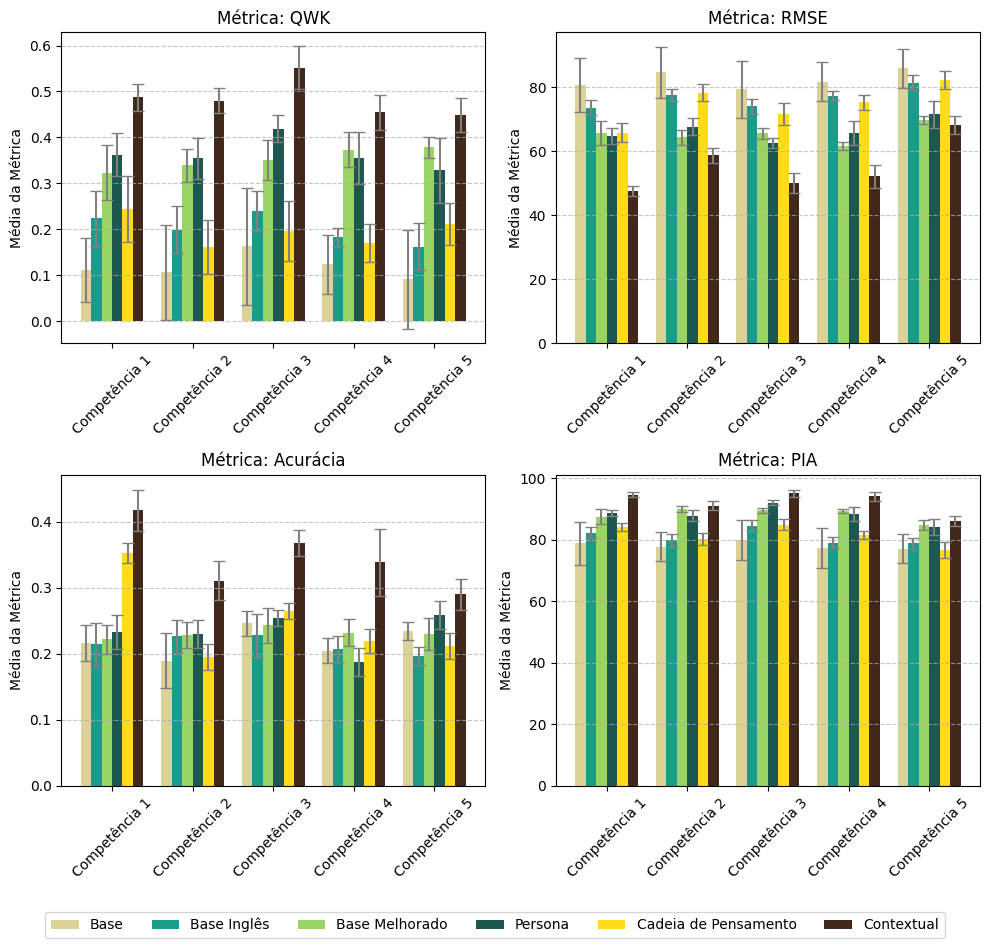

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#model_name = "gxboost"
# Refatoração para calcular e plotar as três métricas de uma vez
metrics = ["QWK",  "RMSE", "Acurácia", "PIA"]
results = {metric: [] for metric in metrics}  # Armazenar os resultados por métrica
datasets = ["essaysFullGrade", "aes_enem_dataset"]
#datasets = ["extended2024"]

# Executar os experimentos para todas as métricas
for j in range(1, 8):
    experiment_name, experiment_code = choose_experiment(j)

    for metric_name in metrics:
        metric_results = []

        for i in range(1, 21):
            id = str(i)

            dfs = []
            try:
                for dataset_name in datasets:
                    path_to_save = create_experiment_folder(path_to, model_name, experiment_name, dataset_name)
                    filename_to_save = build_filename_to_save(model_name, experiment_name, dataset_name, id)
                    dataset_aux = read_csv(path_to_save, filename_to_save)
                    dfs.append(dataset_aux)
            except:
                continue
            dataset = pd.concat(dfs, axis=0)
            nota_original, nota_model = get_grades(dataset, model_name)

            if metric_name == "QWK":
                metric_value = calculate_qwk(nota_original, nota_model)
            elif metric_name == "RMSE":
                metric_value = calculate_rmse(nota_original, nota_model)
            elif metric_name == "MAE":
                metric_value = calculate_mae(nota_original, nota_model)
            elif metric_name == "R2":
                metric_value = calculate_r2(nota_original, nota_model)
            elif metric_name == "SPEARMANR":
                metric_value = calculate_spearmanr(nota_original, nota_model)
            elif metric_name == "MAPE":
                metric_value = calculate_mape(nota_original, nota_model)
            elif metric_name == "PIA":
                metric_value = calculate_pia(nota_original, nota_model)
            elif metric_name == "Acurácia":
                metric_value = calculate_accuracy(nota_original, nota_model)

            metric_results.append(metric_value)
        if len(metric_results) > 0:
            results[metric_name].append({
                "means": np.mean(metric_results, axis=0),
                "stds": np.std(metric_results, axis=0)
            })

# Plotar os gráficos para cada métrica
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=False)
axes = axes.flatten()  # Flatten the axes array to simplify indexing
bar_width = 0.13
x = np.arange(5)  # Supondo 5 competências
colors = ["#d6ce8bff", "#02907dff", "#8fd053ff", "#03453dff", "#ffd700ff", "#2c1001ff", "#72c2d1"]
experiments = ["Base", "Base Inglês", "Base Melhorado", "Persona", "Cadeia de Pensamento", "Contextual"]
#experiments = ["NILC", "NILC+Gemini", "NILC+LLaMA", "NILC+Gemini+LLaMA", "Gemini", "LLaMA", "Gemini+LLaMA"]


for ax, metric_name in zip(axes, metrics):
    for i, experiment_data in enumerate(results[metric_name]):
        means = experiment_data["means"]
        stds = experiment_data["stds"]
        ax.bar(
            x + i * bar_width,
            means,
            yerr=stds,
            width=bar_width,
            label=experiments[i],
            color=colors[i % len(colors)],
            capsize=4,
            alpha=0.9,
            ecolor='gray'
        )

    # Configurações do gráfico
    custom_labels = [f"Competência {i + 1}" for i in range(len(means))]
    ax.set_xticks(x + bar_width * (len(results[metric_name]) - 1) / 2)
    ax.set_xticklabels(custom_labels, rotation=45)
    ax.set_title(f"Métrica: {metric_name}")
    ax.set_ylabel("Média da Métrica")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Ajuste da escala do eixo Y para o QWK
    #if metric_name == "QWK":
    #    ax.set_ylim(0, 0.8)  # Escala apropriada para QWK

# Criar uma única legenda
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=6, bbox_to_anchor=(0.5, 0.05))

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Ajusta espaço para a legenda inferior
plt.show()

In [8]:
fig.savefig("./figures/graph_gxboost_total.png", dpi=300, bbox_inches="tight")

In [ ]:
print(results)

In [27]:
for key in results.keys():
    print()
    print(f"Métrica: {key}")
    for i in range(0, len(results[key])):
        print()
        print(f"Experimento: {i + 1}")
        submetrics = results[key][i]
        for j in range(0, 5):
            #print(f"Competências {j + 1} -> Média: {submetrics['means'][j]:.3f}, Desvio Padrão: {submetrics['stds'][j]:.2f}")
            print(f"Competências {j + 1} -> Média: {submetrics['means'][j]:.6f}")
            
        


Métrica: QWK

Experimento: 1
Competências 1 -> Média: 0.110800
Competências 2 -> Média: 0.105745
Competências 3 -> Média: 0.162851
Competências 4 -> Média: 0.123512
Competências 5 -> Média: 0.090726

Experimento: 2
Competências 1 -> Média: 0.223947
Competências 2 -> Média: 0.198904
Competências 3 -> Média: 0.240114
Competências 4 -> Média: 0.182608
Competências 5 -> Média: 0.162100

Experimento: 3
Competências 1 -> Média: 0.322797
Competências 2 -> Média: 0.339064
Competências 3 -> Média: 0.351448
Competências 4 -> Média: 0.373258
Competências 5 -> Média: 0.377905

Experimento: 4
Competências 1 -> Média: 0.362103
Competências 2 -> Média: 0.354338
Competências 3 -> Média: 0.418961
Competências 4 -> Média: 0.355706
Competências 5 -> Média: 0.327842

Experimento: 5
Competências 1 -> Média: 0.243468
Competências 2 -> Média: 0.160991
Competências 3 -> Média: 0.196531
Competências 4 -> Média: 0.170721
Competências 5 -> Média: 0.211875

Experimento: 6
Competências 1 -> Média: 0.487465
Compet

In [28]:
# Executar os experimentos para todas as métricas

datasets = ["aes_enem_dataset", "essaysFullGrade"]

results_per_experiment = {}
for j in range(1, 7):
    experiment_name, experiment_code = choose_experiment(j)
    all_results = {}
    for competencia in range(1, 7) :
        all_results[competencia] = []
    for i in range(1, 6):
        id = str(i)
        
        dfs = []
        for dataset_name in datasets:
            path_to_save = create_experiment_folder(path_to, model_name, experiment_name, dataset_name)
            filename_to_save = build_filename_to_save(model_name, experiment_name, dataset_name, id)
            dataset_aux = read_csv(path_to_save, filename_to_save)
            dfs.append(dataset_aux)
        dataset = pd.concat(dfs, axis=0)
        nota_original, nota_model = get_grades(dataset, model_name)

        diff = calculate_abs_diff(nota_original, nota_model)
        #diff = [[nota_model[i][j] - nota_original[i][j] for j in range(len(nota_model[0]))] for i in range(len(nota_model))]
        #diff = nota_model
        for competencia in range(1, 7) :
            all_results[competencia].append([sublista[competencia - 1] for sublista in diff])
    
    results_per_experiment[j] = all_results

Experimento escolhido: exp1
Folder './data/results/llama-3.2-90b-text-preview' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1/aes_enem_dataset' already exists.
CSV with the answer will be saved in: aes_enem_dataset-llama-3.2-90b-text-preview-exp1-1
Folder './data/results/llama-3.2-90b-text-preview' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1/essaysFullGrade' already exists.
CSV with the answer will be saved in: essaysFullGrade-llama-3.2-90b-text-preview-exp1-1
Folder './data/results/llama-3.2-90b-text-preview' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1/aes_enem_dataset' already exists.
CSV with the answer will be saved in: aes_enem_dataset-llama-3.2-90b-text-preview-exp1-2
Folder './data/results/

In [29]:
import scipy.stats as stats

def calculate_anova(data):
    """
    Realiza o teste ANOVA de uma lista de listas.
    
    :param data: Lista de listas, onde cada sublista representa um grupo de dados.
    :return: Estatística F e valor-p do teste ANOVA.
    """
    # Valida se há pelo menos dois grupos
    if len(data) < 2:
        raise ValueError("É necessário pelo menos dois grupos para realizar o teste ANOVA.")
    
    # Realiza o teste ANOVA
    f_stat, p_value = stats.f_oneway(*data)
    
    return f_stat, p_value

def calculate_levene(data):
    """
    Realiza o teste Levene de uma lista de listas.
    
    :param data: Lista de listas, onde cada sublista representa um grupo de dados.
    :return: Estatística F e valor-p do teste Levene.
    """
    # Valida se há pelo menos dois grupos
    if len(data) < 2:
        raise ValueError("É necessário pelo menos dois grupos para realizar o teste Levene.")
    
    # Realiza o teste Levene
    f_stat, p_value = stats.levene(*data)
    
    return f_stat, p_value

# Exemplo de uso:
# Cada sublista representa os resultados de uma execução do modelo em diferentes configurações
model_runs = [
    [0.85, 0.87, 0.83],  # Grupo 1
    [0.80, 0.78, 0.82],  # Grupo 2
    [0.90, 0.89, 0.91],  # Grupo 3
]

f_stat, p_value = calculate_anova(model_runs)#results_per_experiment[3][2])

print(f"Estatística F: {f_stat:.10f}")
print(f"Valor-p: {p_value:.10f}")

if p_value < 0.05:
    print("Há diferenças significativas entre os grupos (p < 0.05).")
else:
    print("Não há diferenças significativas entre os grupos (p >= 0.05).")

Estatística F: 25.0000000000
Valor-p: 0.0012299563
Há diferenças significativas entre os grupos (p < 0.05).


In [30]:
len(results_per_experiment[1][1][7])

IndexError: list index out of range

In [34]:
for j in range(1, 7):
    experiment_name, experiment_code = choose_experiment(j)
    all_results = {}
    for competencia in range(1, 6) :
        f_stat, p_value = calculate_anova(results_per_experiment[j][competencia])
        print(f"Testing Experimento {j} with Competência {competencia}")
        print(f"Estatística F: {f_stat:.10f}")
        print(f"Valor-p: {p_value:.10f}")
        
        if p_value < 0.05:
            print("Há diferenças significativas entre os grupos (p < 0.05).")
        else:
            print("Não há diferenças significativas entre os grupos (p >= 0.05).")

Experimento escolhido: exp1
Testing Experimento 1 with Competência 1
Estatística F: 3.5666666667
Valor-p: 0.0236874962
Há diferenças significativas entre os grupos (p < 0.05).
Testing Experimento 1 with Competência 2
Estatística F: 0.8888888889
Valor-p: 0.4885873440
Não há diferenças significativas entre os grupos (p >= 0.05).
Testing Experimento 1 with Competência 3
Estatística F: 3.1774193548
Valor-p: 0.0356825097
Há diferenças significativas entre os grupos (p < 0.05).
Testing Experimento 1 with Competência 4
Estatística F: 0.6800000000
Valor-p: 0.6138792246
Não há diferenças significativas entre os grupos (p >= 0.05).
Testing Experimento 1 with Competência 5
Estatística F: 1.5217391304
Valor-p: 0.2338538683
Não há diferenças significativas entre os grupos (p >= 0.05).
Experimento escolhido: exp2
Testing Experimento 2 with Competência 1
Estatística F: 1.0000000000
Valor-p: 0.4306815544
Não há diferenças significativas entre os grupos (p >= 0.05).
Testing Experimento 2 with Competênc

In [ ]:
from scipy.stats import levene

# Exemplo de dados: três grupos com diferentes variâncias
grupo1 = [7.1, 7.3, 7.5, 7.2, 7.6]
grupo2 = [8.2, 8.5, 8.8, 8.1, 8.3]
grupo3 = [6.7, 6.9, 6.5, 7.0, 6.8]

# Teste de Levene para homogeneidade de variâncias
stat, p_value = levene(grupo1, grupo2, grupo3)

# Resultados
print(f"Estatística de Levene: {stat:.3f}")
print(f"Valor-p: {p_value:.3f}")

# Interpretação
if p_value < 0.05:
    print("As variâncias entre os grupos NÃO são homogêneas (p < 0.05).")
else:
    print("As variâncias entre os grupos são homogêneas (p >= 0.05).")

In [ ]:
for j in range(1, 7):
    experiment_name, experiment_code = choose_experiment(j)
    all_results = {}
    for competencia in range(1, 6) :
        f_stat, p_value = calculate_levene(results_per_experiment[j][competencia])
        print(f"Testing Experimento {j} with Competência {competencia}")
        print(f"Estatística F: {f_stat:.10f}")
        print(f"Valor-p: {p_value:.10f}")
        
        if p_value < 0.05:
            print("Há diferenças significativas entre os grupos (p < 0.05).")
        else:
            print("Não há diferenças significativas entre os grupos (p >= 0.05).")

In [32]:
from scipy.stats import kruskal

for j in range(1, 7):
    experiment_name, experiment_code = choose_experiment(j)
    all_results = {}
    for competencia in range(1, 7) :
        # Teste de Kruskal-Wallis
        stat, p_value = kruskal(*results_per_experiment[j][competencia])

        if (competencia <= 5):
            print(f"Competência {competencia} - Estatística de Kruskal-Wallis: {stat:.3f}, Valor-p: {p_value:.3f}")
        else:
            print(f"Total - Estatística de Kruskal-Wallis: {stat:.3f}, Valor-p: {p_value:.3f}")
        if p_value < 0.05:
            print("Há diferenças significativas entre os grupos.")
        else:
            print("Não há diferenças significativas entre os grupos.")

Experimento escolhido: exp1
Competência 1 - Estatística de Kruskal-Wallis: 9.686, Valor-p: 0.046
Há diferenças significativas entre os grupos.
Competência 2 - Estatística de Kruskal-Wallis: 4.382, Valor-p: 0.357
Não há diferenças significativas entre os grupos.
Competência 3 - Estatística de Kruskal-Wallis: 9.777, Valor-p: 0.044
Há diferenças significativas entre os grupos.
Competência 4 - Estatística de Kruskal-Wallis: 2.554, Valor-p: 0.635
Não há diferenças significativas entre os grupos.
Competência 5 - Estatística de Kruskal-Wallis: 5.600, Valor-p: 0.231
Não há diferenças significativas entre os grupos.
Total - Estatística de Kruskal-Wallis: 5.608, Valor-p: 0.230
Não há diferenças significativas entre os grupos.
Experimento escolhido: exp2
Competência 1 - Estatística de Kruskal-Wallis: 3.983, Valor-p: 0.408
Não há diferenças significativas entre os grupos.
Competência 2 - Estatística de Kruskal-Wallis: 14.971, Valor-p: 0.005
Há diferenças significativas entre os grupos.
Competência

In [33]:
from scipy.stats import chi2_contingency

for j in range(1, 7):
    experiment_name, experiment_code = choose_experiment(j)
    all_results = {}
    for competencia in range(1, 6) :
        # Teste Qui-Quadrado
        stat, p_value, _, _ = chi2_contingency(results_per_experiment[j][competencia])
        
        print(f"Estatística Qui-Quadrado: {stat:.3f}, Valor-p: {p_value:.3f}")
        if p_value < 0.05:
            print("Há diferenças significativas entre as proporções observadas.")
        else:
            print("Não há diferenças significativas entre as proporções observadas.")

Experimento escolhido: exp1
Estatística Qui-Quadrado: 343.788, Valor-p: 0.000
Há diferenças significativas entre as proporções observadas.
Estatística Qui-Quadrado: 428.305, Valor-p: 0.000
Há diferenças significativas entre as proporções observadas.
Estatística Qui-Quadrado: 400.381, Valor-p: 0.000
Há diferenças significativas entre as proporções observadas.
Estatística Qui-Quadrado: 755.979, Valor-p: 0.000
Há diferenças significativas entre as proporções observadas.
Estatística Qui-Quadrado: 368.537, Valor-p: 0.000
Há diferenças significativas entre as proporções observadas.
Experimento escolhido: exp2
Estatística Qui-Quadrado: 339.676, Valor-p: 0.000
Há diferenças significativas entre as proporções observadas.
Estatística Qui-Quadrado: 394.411, Valor-p: 0.000
Há diferenças significativas entre as proporções observadas.
Estatística Qui-Quadrado: 200.353, Valor-p: 0.000
Há diferenças significativas entre as proporções observadas.
Estatística Qui-Quadrado: 888.219, Valor-p: 0.000
Há dif

ValueError: The internally computed table of expected frequencies has a zero element at (np.int64(0), np.int64(0)).